In [1]:
# ERP_visual
#!pip install cartopy
import cartopy.crs as ccrs # import projections
import cartopy.feature as cf # import features
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import seaborn as sns


In [ ]:
# Read longitude and latitude data
nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
lon = nc_albroof.variables['lon'][:]
lat = nc_albroof.variables['lat'][:]

# Find the index ranges corresponding to the longitude and latitude bounds
lon_mask = (lon >= -2.8) & (lon <= -1.8)
lat_mask = (lat >= 53.3) & (lat <= 53.75)

# Convert boolean masks to integer index arrays
lon_idx = np.where(lon_mask)[0]
lat_idx = np.where(lat_mask)[0]

# Assume albroof_subset is a 2D array and lon_idx / lat_idx are the index arrays
lon_Man = lon[lon_idx]
lat_Man = lat[lat_idx]

# pcolormesh expects 2D lon/lat grids; if lon_Man / lat_Man are 1D, expand them with meshgrid
lon_grid, lat_grid = np.meshgrid(lon_Man, lat_Man)

In [ ]:
# read data
# open nc files
# nc_albroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_emroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_albimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emimproad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_IMPROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_emperroad = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_PERROAD_1km_masked_gapfilled_QC.nc', mode='r')
nc_albwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_ALB_WALL_1km_masked_gapfilled_QC.nc', mode='r')
nc_emwall = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_EM_WALL_1km_masked_gapfilled_QC.nc', mode='r')
# nc_windhgtcanyon = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WIND_HGT_CANYON_1km_masked_gapfilled_QC.nc', mode='r')
nc_htroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_HT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_canyonhwr = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_CANYON_HWR_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtlunitroof = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTLUNIT_ROOF_1km_masked_gapfilled_QC.nc', mode='r')
nc_wtroadperv = Dataset('D:\\A_sem2\\ERP\\Simulation\\USurf_1km_netcdf\\USurf_1km_netcdf\\global_WTROAD_PERV_1km_masked_gapfilled_QC.nc', mode='r')

# 
albroof_Man = nc_albroof.variables['ALB_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albroof.close()
print('1')
emroof_Man = nc_emroof.variables['EM_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emroof.close()
print('2')
albimproad_Man = nc_albimproad.variables['ALB_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albimproad.close()
print('3')
emimproad_Man = nc_emimproad.variables['EM_IMPROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emimproad.close()
print('4')
albperroad_Man = nc_albperroad.variables['ALB_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albperroad.close()
print('5')
emperroad_Man = nc_emperroad.variables['EM_PERROAD'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emperroad.close()
print('6')
albwall_Man  = nc_albwall.variables['ALB_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_albwall.close()
print('7')
emwall_Man = nc_emwall.variables['EM_WALL'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_emwall.close()
print('8')
# windhgtcanyon_Man = nc_windhgtcanyon.variables['WIND_HGT_CANYON'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
# nc_windhgtcanyon.close()
# print('9')
htroof_Man = nc_htroof.variables['HT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_htroof.close()
print('9')
canyonhwr_Man = nc_canyonhwr.variables['CANYON_HWR'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_canyonhwr.close()
print('10')
wtlunitroof_Man = nc_wtlunitroof.variables['WTLUNIT_ROOF'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtlunitroof.close()
print('11')
wtroadperv_Man = nc_wtroadperv.variables['WTROAD_PERV'][lat_idx.min():lat_idx.max()+1, lon_idx.min():lon_idx.max()+1]
nc_wtroadperv.close()
print('12')
# close file


1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

# Load the Manchester shapefile
shapefile_path = "D:/A_sem2/ERP/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp"
gdf = gpd.read_file(shapefile_path)
print(gdf.columns)

# Filter administrative units for Greater Manchester, UK
g1 = gdf[(gdf['name'] == 'Manchester') & (gdf['iso_a2'] == 'GB')]
g2 = gdf[(gdf['name'] == 'Stockport') & (gdf['iso_a2'] == 'GB')]
g3 = gdf[(gdf['name'] == 'Wigan') & (gdf['iso_a2'] == 'GB')]
g4 = gdf[(gdf['name'] == 'Bolton') & (gdf['iso_a2'] == 'GB')]
g5 = gdf[(gdf['name'] == 'Salford') & (gdf['iso_a2'] == 'GB')]
g6 = gdf[(gdf['name'] == 'Trafford') & (gdf['iso_a2'] == 'GB')]
g7 = gdf[(gdf['name'] == 'Tameside') & (gdf['iso_a2'] == 'GB')]
g8 = gdf[(gdf['name'] == 'Oldham') & (gdf['iso_a2'] == 'GB')]
g9 = gdf[(gdf['name'] == 'Rochdale') & (gdf['iso_a2'] == 'GB')]
g10 = gdf[(gdf['name'] == 'Bury') & (gdf['iso_a2'] == 'GB')]

# Concatenate GeoDataFrames (axis=0 concatenates rows)
gdf_combined = gpd.GeoDataFrame(pd.concat([g1, g2, g3, g4, g5, g6, g7, g8, g9, g10], axis=0), crs=gdf.crs)

# Merge geometries into a single (Multi)Polygon
manchester_polygon = gdf_combined.unary_union

def mask_data_inside_polygon(lon_grid, lat_grid, data_array, polygon):
    """
    Filter 2D gridded data to keep only points inside a polygon;
    set values outside the polygon to np.nan.

    Parameters:
    - lon_grid: 2D numpy array of longitudes
    - lat_grid: 2D numpy array of latitudes
    - data_array: 2D numpy array of data matching the grids
    - polygon: shapely Polygon or MultiPolygon representing the mask

    Returns:
    - filtered_data: 2D numpy array with values inside polygon kept and
      values outside set to np.nan
    """
    # Flatten the lon/lat grids and create shapely Points
    points = [Point(x, y) for x, y in zip(lon_grid.flatten(), lat_grid.flatten())]
    # Determine which points are inside the polygon
    mask = np.array([polygon.contains(pt) for pt in points])

    # Create an array full of NaNs
    filtered_data = np.full(data_array.size, np.nan)

    # Keep data only for points inside the polygon
    filtered_data[mask] = data_array.flatten()[mask]

    # Reshape back to the original 2D shape
    filtered_data = filtered_data.reshape(data_array.shape)

    return filtered_data

# Example usage (commented out):
# filtered_data = mask_data_inside_polygon(lon_grid, lat_grid, htroof_Man, manchester_polygon)
# plt.figure(figsize=(8,6))
# plt.pcolormesh(lon_grid, lat_grid, filtered_data, shading='auto', cmap='viridis')
# plt.colorbar()
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('wtroadperv_Man')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21332\3644932700.py:25: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  manchester_polygon = gdf_combined.unary_union


In [ ]:
# Determine the spatial dimensions of each 2D variable
height, width = albroof_Man.shape

# How many features did you read? Example uses 12 — replace with your actual count
num_features = 12

# Create an empty 3D array: (n_features, height, width)
features = np.empty((num_features, height, width), dtype=albroof_Man.dtype)

# Store 2D variables into the features array
features[0, :, :] = albroof_Man
features[1, :, :] = emroof_Man
features[2, :, :] = albimproad_Man
features[3, :, :] = emimproad_Man
features[4, :, :] = albperroad_Man
features[5, :, :] = emperroad_Man
features[6, :, :] = albwall_Man
features[7, :, :] = emwall_Man
# features[8, :, :] = windhgtcanyon_Man  # optional, commented out
features[8, :, :] = htroof_Man
features[9, :, :] = canyonhwr_Man
features[10, :, :] = wtlunitroof_Man
features[11, :, :] = wtroadperv_Man

print(features.shape)

# Quick checks / displays (Jupyter-style)
display(emroof_Man[0, 0])
display(features[:, 0, 0])

# Example: take feature index 4, flatten it to 1D
ff = features[4, :, :]
ff_flat = ff.reshape(-1)
print(ff_flat.shape)

(12, 50, 112)


masked

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

(5600,)


### Use klaML for prediction

In [6]:
# =============load model================
import pickle
automl1 = pickle.load(open('ERP_automl_model_TSAmax.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl2 = pickle.load(open('ERP_automl_model_TSAmean.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl3 = pickle.load(open('ERP_automl_model_RH2Mmax.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl4 = pickle.load(open('ERP_automl_model_RH2Mmean.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl5 = pickle.load(open('ERP_automl_model_HIAmax.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
automl6 = pickle.load(open('ERP_automl_model_HIAmean.pkl', 'rb'))#&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&

d:\python_Anaconda_install\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-02 08:23:48,755	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-09-02 08:23:49,011	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [ ]:
num_features, height, width = features.shape

X_klaml = features.reshape(num_features, -1).T
print(X_klaml.shape)

y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_klaml_5 = automl5.predict(X_klaml)
mask = y_pred_klaml_5 > 45
if mask.any():
    y_pred_klaml_5[mask] = np.random.uniform(35, 45, size=mask.sum())
y_pred_klaml_6 = automl6.predict(X_klaml)

y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

kff = X_klaml[:,4]
print(kff.shape)

(5600, 12)
(5600,)


In [ ]:
import numpy as np

# Find grid cells where all feature layers are NaN
# features shape: (num_features, height, width)
nan_mask = np.isnan(features).all(axis=0)  # shape: (height, width)

# Prepare model input (flatten features into samples x features)
# Assuming X_klaml is built like this in your actual code:
# X_klaml = features.reshape(num_features, -1).T  # shape: (H*W, num_features)

# Run predictions (each model returns an array of shape (H*W,))
y_pred_klaml_1 = automl1.predict(X_klaml)
y_pred_grid_klaml_1 = y_pred_klaml_1.reshape(height, width)

y_pred_klaml_2 = automl2.predict(X_klaml)
y_pred_grid_klaml_2 = y_pred_klaml_2.reshape(height, width)

y_pred_klaml_3 = automl3.predict(X_klaml)
y_pred_grid_klaml_3 = y_pred_klaml_3.reshape(height, width)

y_pred_klaml_4 = automl4.predict(X_klaml)
y_pred_grid_klaml_4 = y_pred_klaml_4.reshape(height, width)

y_pred_klaml_5 = automl5.predict(X_klaml)
y_pred_grid_klaml_5 = y_pred_klaml_5.reshape(height, width)

y_pred_klaml_6 = automl6.predict(X_klaml)
y_pred_grid_klaml_6 = y_pred_klaml_6.reshape(height, width)

# Apply the mask: set predictions at fully-NaN input cells to NaN
y_pred_grid_klaml_1[nan_mask] = np.nan
y_pred_grid_klaml_2[nan_mask] = np.nan
y_pred_grid_klaml_3[nan_mask] = np.nan
y_pred_grid_klaml_4[nan_mask] = np.nan
y_pred_grid_klaml_5[nan_mask] = np.nan
y_pred_grid_klaml_6[nan_mask] = np.nan

In [ ]:
# Prepare and mask model predictions to the Manchester polygon
y_pred_grid_klaml_filtered_1 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_1 - 273.15, manchester_polygon
)
y_pred_grid_klaml_filtered_2 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_2 - 273.15, manchester_polygon
)
y_pred_grid_klaml_filtered_3 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_3, manchester_polygon
)
y_pred_grid_klaml_filtered_4 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_4, manchester_polygon
)
y_pred_grid_klaml_filtered_5 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_5, manchester_polygon
)
y_pred_grid_klaml_filtered_6 = mask_data_inside_polygon(
    lon_grid, lat_grid, y_pred_grid_klaml_6, manchester_polygon
)

# Example plotting (uncomment and adjust colormap/cbar label as needed)
# plt.pcolormesh(lon_grid, lat_grid, y_pred_grid_klaml_filtered_1, shading='auto', cmap='viridis')
# plt.colorbar(label='')  # set an appropriate label, e.g., 'TSA (°C)' or 'RH2M (%)'
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('HIA in Selected Region (lon 53-54, lat -3 to -2)')
# gdf_combined.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=1)
# plt.show()

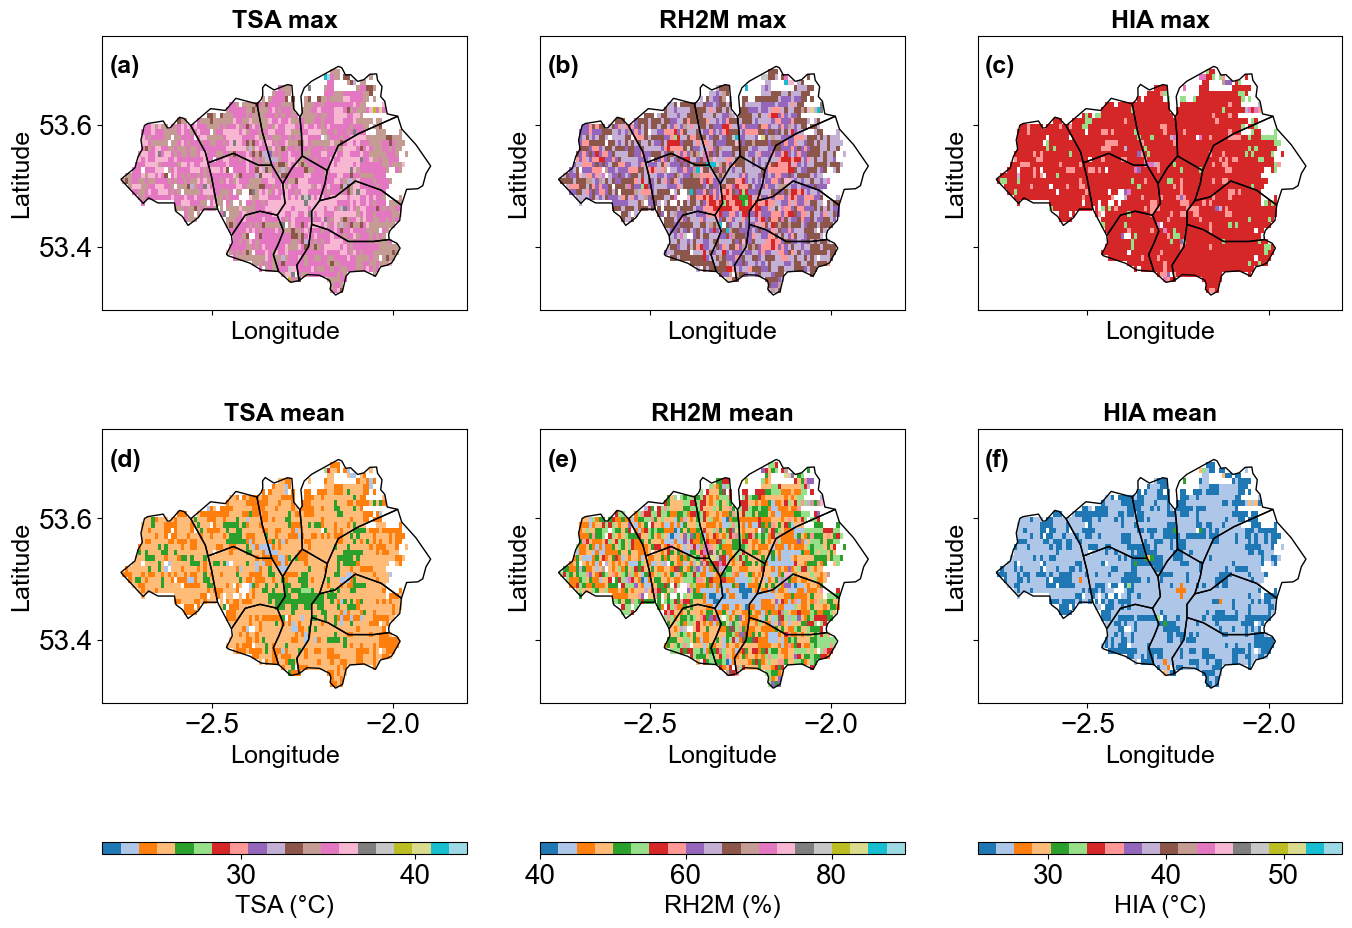

In [ ]:
import string
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.title_fontsize'] = 20

# Clip HIA max values to 43
y_pred_grid_klaml_filtered_5[y_pred_grid_klaml_filtered_5 > 43] = 43

variables = [
    (y_pred_grid_klaml_filtered_1, 'TSA max'),
    (y_pred_grid_klaml_filtered_3, 'RH2M max'),
    (y_pred_grid_klaml_filtered_5, 'HIA max'),
    (y_pred_grid_klaml_filtered_2, 'TSA mean'),
    (y_pred_grid_klaml_filtered_4, 'RH2M mean'),
    (y_pred_grid_klaml_filtered_6, 'HIA mean')
]

# Unit selection helper
def get_unit(title):
    return '(%)' if 'RH2M' in title else '(°C)'

# Color bounds per variable family
vminmax = {
    'TSA': (22, 43),
    'RH2M': (40, 90),
    'HIA': (24, 55)
}

# Colormap per column (customize if you want different maps)
cmaps = ['tab20', 'tab20', 'tab20']
col_titles = ['TSA', 'RH2M', 'HIA']

fig, axes = plt.subplots(2, 3, figsize=(16, 12), sharex=True, sharey=True)
panel_labels = list(string.ascii_lowercase)[:6]

for idx, (ax, (data, title)) in enumerate(zip(axes.flat, variables)):
    col = idx % 3
    var_name = col_titles[col]
    vmin, vmax = vminmax[var_name]
    cmap = cmaps[col]

    pcm = ax.pcolormesh(
        lon_grid, lat_grid, data,
        shading='auto', cmap=cmap, vmin=vmin, vmax=vmax
    )
    # Plot polygon boundaries
    gdf_combined.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Panel label (a)-(f)
    ax.text(
        0.02, 0.93, f'({panel_labels[idx]})',
        transform=ax.transAxes, fontsize=18, fontweight='bold', va='top', ha='left'
    )

# Add a horizontal colorbar for each column
for i, var_name in enumerate(col_titles):
    unit = get_unit(var_name)
    fig.colorbar(
        axes[0, i].collections[0],
        ax=axes[:, i],
        orientation='horizontal',
        fraction=0.07, pad=0.15,
        aspect=30,
        label=f'{var_name} {unit}'
    )

# Save and show
plt.savefig('ERP_6_variable_mapping.png', dpi=300)
plt.show()